In [41]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import struct

# Daten lib

In [42]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        _, n_images, cols, rows = struct.unpack('>IIII', f.read(16))
        all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
        return all_pixels.reshape(n_images, cols*rows)

def prepend_bias(X):
    return np.insert(X, 0, 1, axis=1)

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)
        all_labels = f.read()
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1,1)

def encode_fives(Y):
    return (Y==5).astype(int)

Load data

In [43]:
# load data

X_train = prepend_bias(load_images('data/mnist/train-images-idx3-ubyte.gz'))
X_test = prepend_bias(load_images('data/mnist/t10k-images-idx3-ubyte.gz'))

Y_train = encode_fives(load_labels('data/mnist/train-labels-idx1-ubyte.gz'))
Y_test = encode_fives(load_labels('data/mnist/t10k-labels-idx1-ubyte.gz'))

# Explore the data

X_train is training data for the input varibles X. Here, X consists of images of handwritten digits



Explore X the data. For example, find out
- how many images are there in X_train
- how large is each image
- plot an image as a vector, plt.plot(a). What does it look like? Explain!
- reshape the 'images' into a 2D array (hint: its a square)
- plot images

Explore the Y data. For example, find out
- what type of vales are stored in Y
- what's the min and max value
- what do the ones in Y correspond to in X
- what's the shape of the array? Why?


Possible tools
- len(a) returns the legnth of an array or a list
- a.shape (alternatively numpy.shape(a)) returns the shape of an array 
- a[0] returns the first element of a 1d array or the first line of an array (equivalent to a[0,:])
- a.reshape(n,m) returns a reshaped array as a n-by-m array (if possible)
- plt.imshow(a)
- max, min
- iteration: for i in range(start, stop): ... loops over i = start, start+1, ..., stop-1

# Machine learning bib

In [68]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(forward(X,w))

def loss(X, Y, w):
    y = forward(X,w)
    return -np.average(Y*np.log(y) + (1-Y)*np.log(1-y))

def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X,w)-Y))/X.shape[0]

def train(X, Y, iterations, lr):
    losses = np.zeros(iterations)
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        losses[i] = loss(X,Y,w)
        print('iteration {} => Loss: {}'.format(i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return [w, losses]

def test(X, Y, x):
    tot_examples = X.shape[0]
    correct_results = np.sum(classify(X,w) == Y)
    success_rate = correct_results * 100 / tot_examples
    print('\nSuccess: {}/{} ({})'.format(correct_results, tot_examples, success_rate))


# Train and test a classifyer for 5 or not-5

In [71]:
# select a subset for training and testing

first_ind = 0
last_ind = len(X_train) # exclusive

X_train_select = X_train[first_ind:last_ind]
Y_train_select = Y_train[first_ind:last_ind]
X_test_select = X_test[first_ind:last_ind]
Y_test_select = Y_test[first_ind:last_ind]


In [72]:
[w, losses] = train(X_train_select, Y_train_select, iterations=100, lr=1e-5)

iteration 0 => Loss: 0.6931471805599453
iteration 1 => Loss: 0.8004253025949019
iteration 2 => Loss: 0.6037018000801918
iteration 3 => Loss: 0.41561114405207117
iteration 4 => Loss: 0.264885394555525
iteration 5 => Loss: 0.2197496658646801
iteration 6 => Loss: 0.2116971966744956
iteration 7 => Loss: 0.2047508247871004
iteration 8 => Loss: 0.19886878484015674
iteration 9 => Loss: 0.19372162858641284
iteration 10 => Loss: 0.18918194048765818
iteration 11 => Loss: 0.18512959704505969
iteration 12 => Loss: 0.1814815604080142
iteration 13 => Loss: 0.17817479685293547
iteration 14 => Loss: 0.17515915471115795
iteration 15 => Loss: 0.17239535061657862
iteration 16 => Loss: 0.16985095072606282
iteration 17 => Loss: 0.16749932830345124
iteration 18 => Loss: 0.1653180724308886
iteration 19 => Loss: 0.16328826613520675
iteration 20 => Loss: 0.16139375633494252
iteration 21 => Loss: 0.15962067801752663
iteration 22 => Loss: 0.15795704638735247
iteration 23 => Loss: 0.15639244690731702
iteration 24

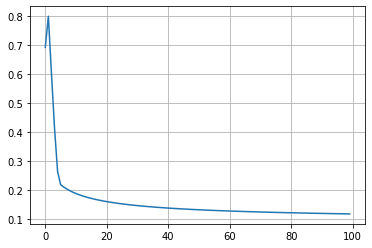

In [79]:
# plot losses over iterations
plt.plot(losses)
plt.grid()

In [80]:
# test accuracy
test(X_test, Y_test, w)


Success: 9637/10000 (96.37)


# Exercises

Experiment with different hyperparameters (hyperparameters are parameters for the training - not model parameters)
- size of the train and test data sets
- number of iterations
- lerning rate

Find out which fives were classified corretly and which were not
- find them (i.e. there indices in the dataset)
- visualize them

Maybe (I did not try!) you can find systematic errors compared to our human classification. For example, select a very small training data set in which all fives are "similar" to humans. Then check if during testing it finds mostly those "similar" to the trained ones. 

A useful strategy is called batching. 
- Divide your training data set in batches (e.g. 6 batches of 10000 each)
- train on first batch and get weights
- START training of second batch with the weights returned by the first batch
- and so on
Compare the success rate to training on the full set. 
